In [117]:
#svm_classifier 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_score, recall_score
#from sklearn.metrics import f1_score as f_1Score
from sklearn.metrics import f1_score as f1Score

In [119]:
dataset = pd.read_csv(r"C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/ai/archive/smoking_health_data_final1.csv")

In [121]:
def categorize_cholesterol(value):
    if value < 200:
        return 1
    elif 200 <= value < 248:
        return 2
    else:
        return 3

In [123]:
dataset = dataset.fillna(0)

if 'chol' in dataset.columns:
   
    dataset['chol'] = pd.to_numeric(dataset['chol'], errors='coerce')  # Convert to numeric, set invalid to NaN
    dataset['chol'] = dataset['chol'].fillna(0) 

    dataset['target'] = dataset['chol'].apply(categorize_cholesterol)

In [125]:
dataset['target'] = dataset['chol'].apply(categorize_cholesterol)
X = dataset.drop(['chol', 'target'], axis=1)
Y = dataset['target'] 
dataset

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,target
0,54,male,yes,95,110/72,0,219.0,2
1,45,male,yes,64,121/72,0,248.0,3
2,58,male,yes,81,127.5/76,0,235.0,2
3,42,male,yes,90,122.5/80,0,225.0,2
4,42,male,yes,62,119/80,0,226.0,2
...,...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60,254.0,3
3896,49,male,yes,70,123/75,60,213.0,2
3897,56,male,yes,70,125/79,60,246.0,2
3898,50,male,yes,85,134/95,60,340.0,3


In [127]:
dataset = dataset.fillna(0)

if 'blood_pressure' in dataset.columns:
    dataset[['blood_pressure_systolic', 'blood_pressure_diastolic']] = dataset['blood_pressure'].str.split('/', expand=True)
    dataset['blood_pressure_systolic'] = pd.to_numeric(dataset['blood_pressure_systolic'], errors='coerce').fillna(0)
    dataset['blood_pressure_diastolic'] = pd.to_numeric(dataset['blood_pressure_diastolic'], errors='coerce').fillna(0)
    dataset = dataset.drop(['blood_pressure'], axis=1)

In [129]:
dataset = pd.get_dummies(dataset, columns=['sex'])
dataset = pd.get_dummies(dataset, columns=['current_smoker']) 


In [131]:

dataset = dataset.drop(['chol', 'target'], axis=1)
print(dataset.head())

   age  heart_rate  cigs_per_day  blood_pressure_systolic  \
0   54          95             0                    110.0   
1   45          64             0                    121.0   
2   58          81             0                    127.5   
3   42          90             0                    122.5   
4   42          62             0                    119.0   

   blood_pressure_diastolic  sex_female  sex_male  current_smoker_no  \
0                      72.0       False      True              False   
1                      72.0       False      True              False   
2                      76.0       False      True              False   
3                      80.0       False      True              False   
4                      80.0       False      True              False   

   current_smoker_yes  
0                True  
1                True  
2                True  
3                True  
4                True  


In [133]:
dataset['sex_female'] = dataset['sex_female'].replace({True: 1, False: 0})
dataset['sex_male'] = dataset['sex_male'].replace({True: 1, False: 0})
dataset['current_smoker_no'] = dataset['current_smoker_no'].replace({True: 1, False: 0})
dataset['current_smoker_yes'] = dataset['current_smoker_yes'].replace({True: 1, False: 0})
dataset

,age,heart_rate,cigs_per_day,blood_pressure_systolic,blood_pressure_diastolic,sex_female,sex_male,current_smoker_no,current_smoker_yes
0,54,95,0,110.0,72.0,0,1,0,1
1,45,64,0,121.0,72.0,0,1,0,1
2,58,81,0,127.5,76.0,0,1,0,1
3,42,90,0,122.5,80.0,0,1,0,1
4,42,62,0,119.0,80.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
3895,37,88,60,122.5,82.5,0,1,0,1
3896,49,70,60,123.0,75.0,0,1,0,1
3897,56,70,60,125.0,79.0,0,1,0,1
3898,50,85,60,134.0,95.0,0,1,0,1


In [135]:
X= dataset
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#X = dataset.iloc[:, :-1]


#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)


#pca = PCA(n_components=0.95)  # Retain 95% of the variance
#X_pca = pca.fit_transform(X_scaled)

#print(f"Original number of features: {X.shape[1]}")  
#print(f"Reduced number of features after PCA: {X_pca.shape[1]}")
#!!!!!!!!!!!!!!!!!!!!!!!!!!


Original number of features: 8
Reduced number of features after PCA: 6


In [137]:
#X

In [139]:
#Y

In [141]:
test_size1 = 0.2
random_state1 = 9
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size1, random_state=random_state1 )

In [143]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=0)
svm_classifier.fit(X_train, Y_train)


SVC(C=1, class_weight='balanced', random_state=0)

In [145]:
Y_pred = svm_classifier.predict(X_test)


In [147]:
Y_test = np.array(Y_test)
Y_pred = np.array(Y_pred)

In [149]:
accuracy_svm = accuracy_score(Y_test, Y_pred)  # Corrected this line
print("Support Vector Machine (SVM) Classifier Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report(Y_test, Y_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Support Vector Machine (SVM) Classifier Accuracy: 0.43974358974358974
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.69      0.46       167
           2       0.49      0.18      0.27       320
           3       0.52      0.57      0.54       293

    accuracy                           0.44       780
   macro avg       0.45      0.48      0.42       780
weighted avg       0.47      0.44      0.41       780

SVM Confusion Matrix:
 [[116  14  37]
 [141  59 120]
 [ 78  47 168]]


In [151]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_classifier, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean()}")


Cross-Validation Accuracy: 0.4076923076923077


In [152]:
report = classification_report(Y_test, Y_pred, output_dict=True)

In [153]:
categories = list(report.keys())[:-3]  
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]
support = [report[category]['support'] for category in categories]

In [157]:
x = range(len(categories))

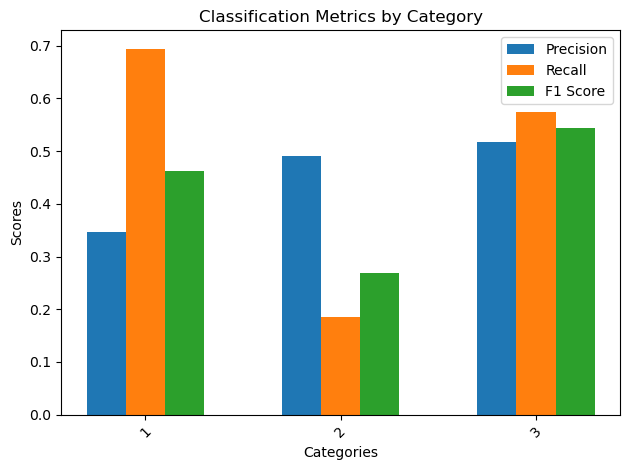

In [159]:
fig, ax = plt.subplots()
width = 0.2 

bar1 = ax.bar([i - width for i in x], precision, width, label='Precision')
bar2 = ax.bar(x, recall, width, label='Recall')
bar3 = ax.bar([i + width for i in x], f1_score, width, label='F1 Score')
ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
'''
This bar chart shows the classification performance metrics—precision, recall, and F1-score—for 
three categories (1, 2, and 3). Each metric is represented by a different colour: blue for 
precision, orange for recall, and green for the F1 score. The scores for category 3 are the
highest across all metrics, indicating better model performance for this class than the others.
Category 1 has relatively lower scores, suggesting that the model struggles more with this class. 
'''

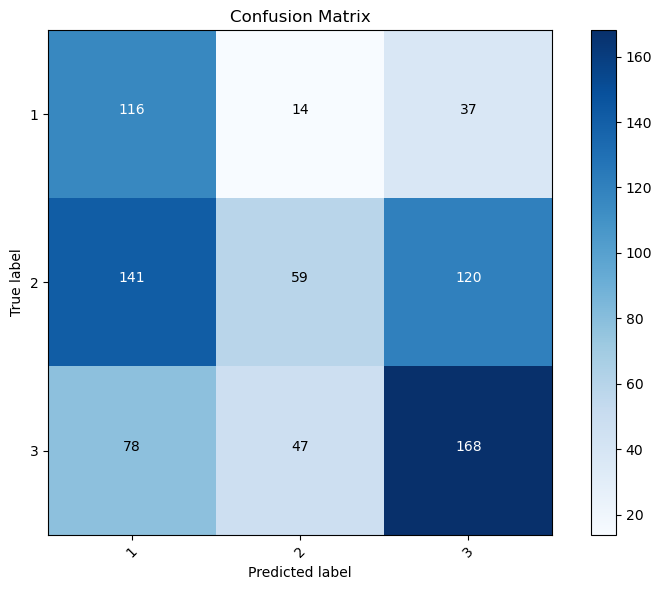

In [161]:



# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks for classes
categories = np.unique(Y_test)  # Ensure categories are derived from the data
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)

# Add numerical values to the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()





In [ ]:
'''
 The confusion matrix visualizes the performance of a classification model across three classes: 
 1, 2, and 3. The rows represent the true labels, while the columns represent the predicted labels. 
 Diagonal values (e.g., 116 for class 1, 59 for class 2, and 168 for class 3) indicate correct 
 predictions. Off-diagonal values represent misclassifications, such as 141 instances of class 
 2 being misclassified as class 1. Class 3 has the highest correct predictions (168), 
 suggesting the model performs well in identifying this class. However, class 2 shows 
 significant misclassifications into other classes, especially class 1. Overall,
 the confusion matrix emphasizes areas where the model succeeds (on the diagonal) and where it struggles (off-diagonal).
'''

In [163]:
Y_test 
Y_pred

array([3, 1, 2, 3, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 2, 3, 2, 1, 1,
       1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 2, 1, 3, 2, 1, 3, 1, 2, 2, 1, 1,
       3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1,
       3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 3, 1, 2, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 3,
       3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 3, 3, 3, 2, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       3, 3, 2, 3, 2, 1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 1, 3, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3,
       3, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3, 1, 3, 3, 1, 1,
       3, 2, 1, 1, 2, 1, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 3, 3,
       3, 2, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 3, 1, 1, 3, 2, 3, 1, 1, 1, 3,
       1, 2, 2, 2, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 3,

In [165]:
from sklearn.metrics import precision_score

pre_score = precision_score(Y_test, Y_pred, average='weighted')
print("Precision Score (Weighted):", pre_score)


Precision Score (Weighted): 0.4700239237736367


In [167]:
from sklearn.metrics import recall_score

In [169]:
print("Type of f1_score:", type(f1_score))

Type of f1_score: <class 'list'>


In [171]:
accuracy_result = accuracy_score(Y_test, Y_pred)
precision_result = precision_score(Y_test, Y_pred, average='weighted')

print(f1_score)
recall_result1 = recall_score(Y_test, Y_pred, average='weighted')
f1_result = f1Score(Y_test, Y_pred, average='weighted') 

[0.46215139442231074, 0.2681818181818182, 0.5436893203883495]


In [173]:
#recall_result = recall_score(Y_test, Y_pred, average='weighted')
#f1_result = f1Score(Y_test, Y_pred, average='weighted') 
roc_auc = None  

report_dict = classification_report(Y_test, Y_pred, output_dict=True)
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [175]:
data = {
    "Test_Size": test_size1,
    "random_state": random_state1,
    "accuracy": accuracy_result
}

In [177]:
import os
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):  # Only include metrics for each label
        for metric, value in metrics.items():
            if metric in ['precision', 'recall', 'f1-score', 'support']:  # Only specified metrics
                data[f"{label}_{metric}"] = value

In [179]:
df = pd.DataFrame([data])
csv_file = "svm_classifier_Results_improve.csv"


In [181]:

if os.path.isfile(csv_file):
    existing_df = pd.read_csv(csv_file)
    if not existing_df.equals(df):
        df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)